# Bitcoin Volatility Exploratory Data Analysis

This notebook will be focused around doing exploratory data analysis and simple statistics on the bitcoin timeseries.

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns 

sns.set()

In [17]:
df = pd.read_parquet("bitcoin.parquet").reset_index()

In [18]:
df.head()

,index,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,2,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643
1,10,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037
2,18,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309
3,26,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999
4,34,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079


In [27]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')

In [31]:
df['Return'] = (df['Close'] - df['Close'].shift(-1)) / df['Close'].shift(-1)

### Price and Return Evolution

In [21]:
df['Close'][0]

13850.176

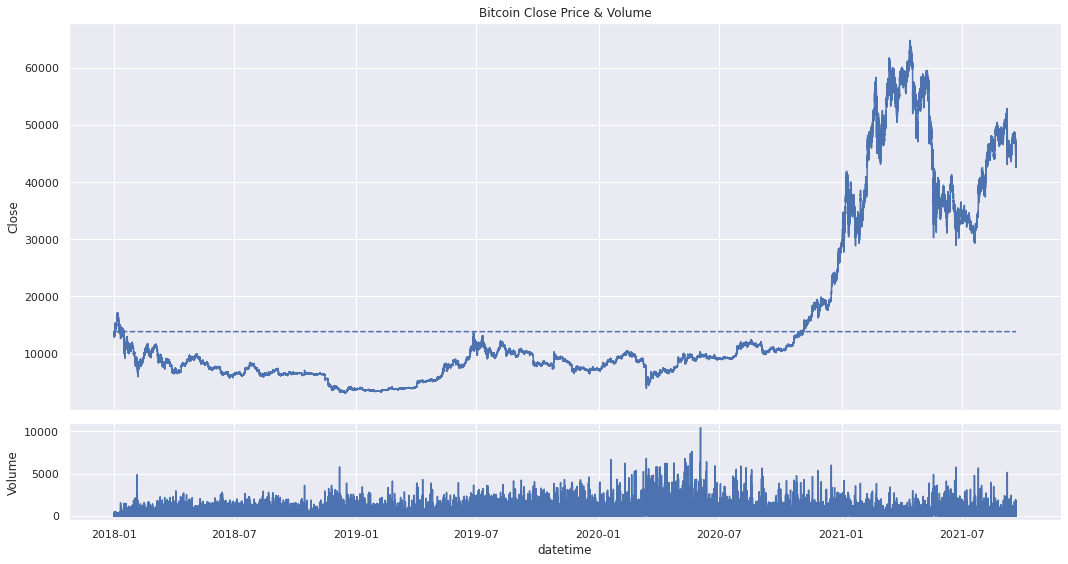

In [26]:
initial_price = np.full(len(df), df['Close'][0])
# specify plot layouts with different width using subplots()
f, axs = plt.subplots(2,1,
                      figsize=(15,8),
                      sharex=True,
                      gridspec_kw=dict(height_ratios=[2,0.5]))

# make scatterplot with legends
sns.lineplot(data=df,
                x="datetime", y="Close",
                ax=axs[0],
                color='b'
                ).set(title="Bitcoin Close Price & Volume")
sns.lineplot(data=df,
                x='datetime',
                y=initial_price,
                ax=axs[0],
                linestyle='dashed',
                color='b')
sns.lineplot(data=df,
                x="datetime",
                y="Volume",
                ax=axs[1],
                legend=False,
                color='b')
f.tight_layout()
# plt.savefig('bitcoin-close-and-volume.png')

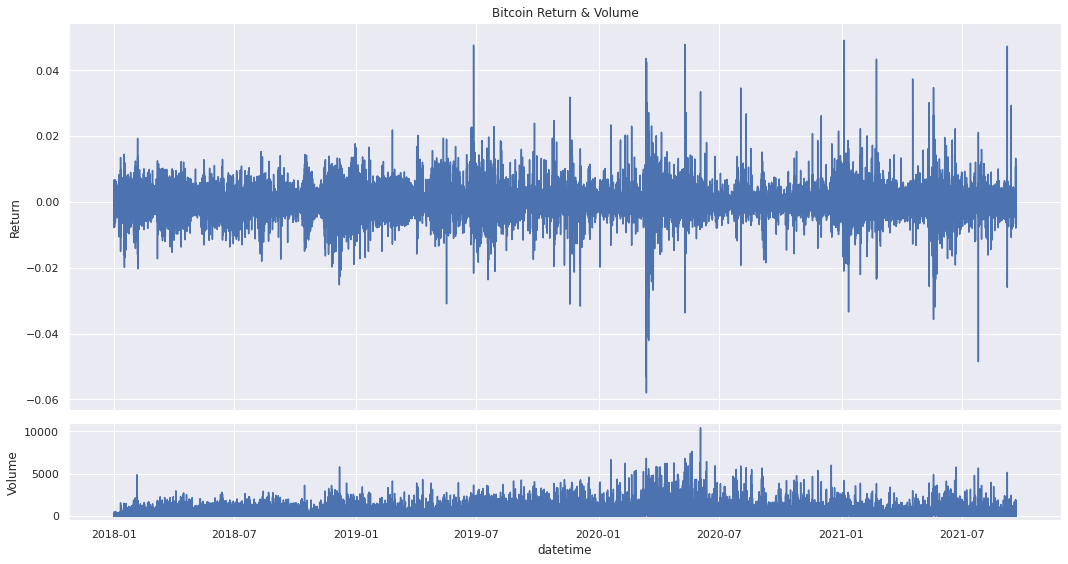

In [36]:
# specify plot layouts with different width using subplots()
f, axs = plt.subplots(2,1,
                      figsize=(15,8),
                      sharex=True,
                      gridspec_kw=dict(height_ratios=[2,0.5]))

# make scatterplot with legends
sns.lineplot(data=df.iloc[1:, :],
                x="datetime", y="Return",
                ax=axs[0],
                color='b'
                ).set(title="Bitcoin Return & Volume")
sns.lineplot(data=df.iloc[1:, :],
                x="datetime",
                y="Volume",
                ax=axs[1],
                legend=False,
                color='b')
f.tight_layout()
# plt.savefig('bitcoin-close-and-volume.png')

### Summary Statistics

In [80]:
stats.describe(df.iloc[1:, 12])

DescribeResult(nobs=1956281, minmax=(nan, nan), mean=nan, variance=nan, skewness=nan, kurtosis=nan)